# Exploratory Data Analysis

In [6]:
import pandas as pd
import numpy as np
import os

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
import datetime as dt

In [9]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
from wordcloud import WordCloud, STOPWORDS

In [10]:
#create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd + "/cleaned-BritAir-reviews.csv", index_col=0)

In [11]:
df.reset_index(drop = True)

reviews  stars        date  \
0     Not Verified | BA is not treating its premium ...    NaN  2023-07-06   
1     ✅ Trip Verified |  24 hours before our departu...    4.0  2023-07-05   
2     ✅ Trip Verified |  We arrived at Heathrow at 0...    1.0  2023-07-05   
3     ✅ Trip Verified |  Original flight was cancell...    1.0  2023-07-04   
4     Not Verified |  Airport check in was functiona...    3.0  2023-07-03   
...                                                 ...    ...         ...   
3488  Flew World Traveller Plus for the first time. ...    7.0  2014-06-12   
3489  Glasgow to LHR on a completely full flight. Th...    NaN  2014-06-12   
3490  LHR-CPH-LHR both A320s. Other than bussed to s...    4.0  2014-06-12   
3491  The outward trip Manchester - Heathrow - Milan...    7.0  2014-06-10   
3492  LHR to DXB Return. Outbound flight delayed 2 h...    2.0  2014-06-10   

             country  verified  \
0     United Kingdom     False   
1       South Africa      True   
2     United Kingdom      True   
3             Greece      True   
4              Italy     False   
...              ...       ...   
3488          Canada     False   
3489  United Kingdom     False   
3490  United Kingdom     False   
3491  United Kingdom     False   
3492  United Kingdom     False   

                                                 corpus  
0     verified ba treating premium economy passenger...  
1     hour departure ba cape town heathrow thursday ...  
2     arrived heathrow find flight ibiza cancelled b...  
3     original flight cancelled explanation represen...  
4     verified airport check functionary little warm...  
...                                                 ...  
3488  flew world traveller plus first time trip lhr ...  
3489  glasgow lhr completely full flight crew amazin...  
3490  lhr cph lhr bussed stand outward good bus unex...  
3491  outward trip manchester heathrow milan fine ev...  
3492  lhr dxb return outbound flight delayed hour we...  

[3493 rows x 6 columns]

In [12]:
df.head()

reviews  stars        date  \
0  Not Verified | BA is not treating its premium ...    NaN  2023-07-06   
1  ✅ Trip Verified |  24 hours before our departu...    4.0  2023-07-05   
2  ✅ Trip Verified |  We arrived at Heathrow at 0...    1.0  2023-07-05   
3  ✅ Trip Verified |  Original flight was cancell...    1.0  2023-07-04   
4  Not Verified |  Airport check in was functiona...    3.0  2023-07-03   

          country  verified                                             corpus  
0  United Kingdom     False  verified ba treating premium economy passenger...  
1    South Africa      True  hour departure ba cape town heathrow thursday ...  
2  United Kingdom      True  arrived heathrow find flight ibiza cancelled b...  
3          Greece      True  original flight cancelled explanation represen...  
4           Italy     False  verified airport check functionary little warm...

In [13]:
# what is
df.stars.mean()

4.715873996294008

Text(0.5, 0.98, 'Tally per ratings')

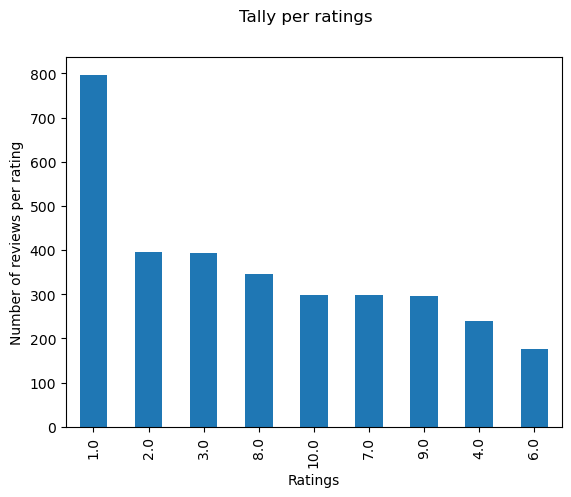

In [20]:
df.stars.value_counts().plot(kind = "bar")
plt.xlabel("Ratings")
plt.ylabel("Number of reviews per rating")
plt.suptitle("Tally per ratings")

In [15]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [16]:
df_ratings = df_ratings.reset_index()

In [17]:
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace = True)

In [18]:
df_ratings

Stars  total_counts  pct_values
0    1.0           797       24.61
1    2.0           395       12.20
2    3.0           394       12.17
3    8.0           346       10.69
4   10.0           298        9.20
5    7.0           298        9.20
6    9.0           295        9.11
7    4.0           239        7.38
8    6.0           176        5.44

Text(0.5, 1.0, 'Tally per ratings')

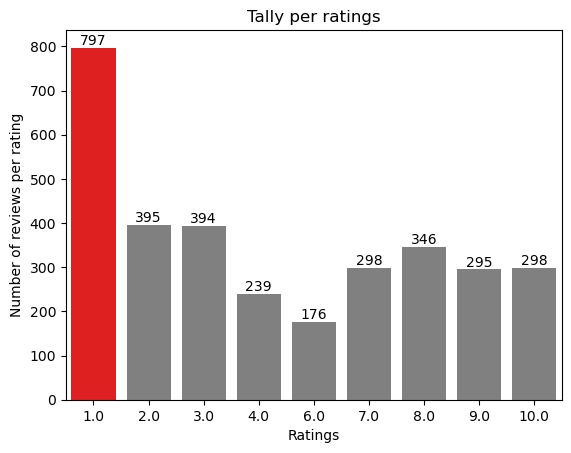

In [21]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Number of reviews per rating")
ax.set_title("Tally per ratings")

In [22]:
# No. of countries the airline recieved reviews from

print(f"{len(df.country.unique())} unique countries")

69 unique countries


In [23]:
# To know which country gave the most reviews
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [24]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace = True)

Text(0.5, 1.0, 'Most reviews by country')

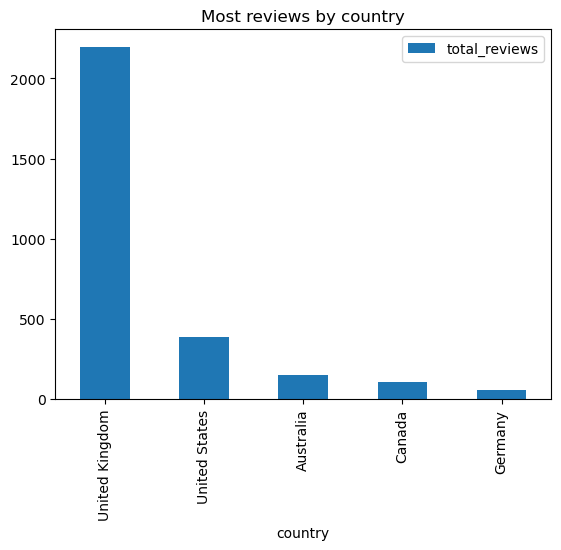

In [25]:
df_country_review.plot(kind="bar", x='country')
plt.title("Most reviews by country")

# Start from here, try to undrstand

In [27]:
# now which country gave the highest reviews
df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()

/var/folders/dy/dqhw7z8935n9y890gwzs4tqr0000gn/T/ipykernel_11723/3286935093.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()


In [28]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

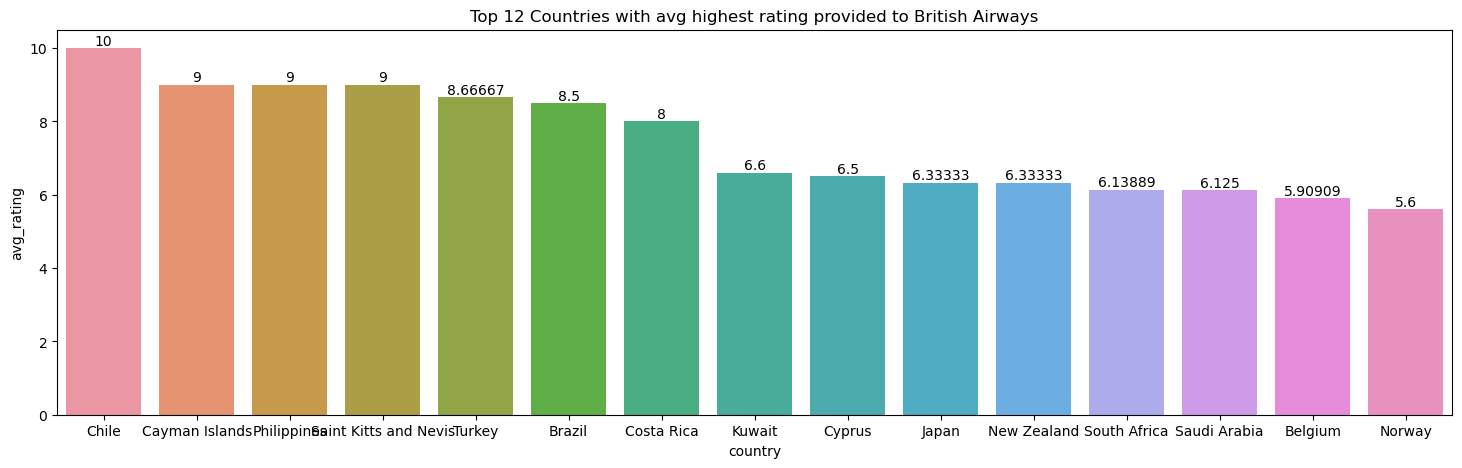

In [30]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:15])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

In [31]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)


In [32]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

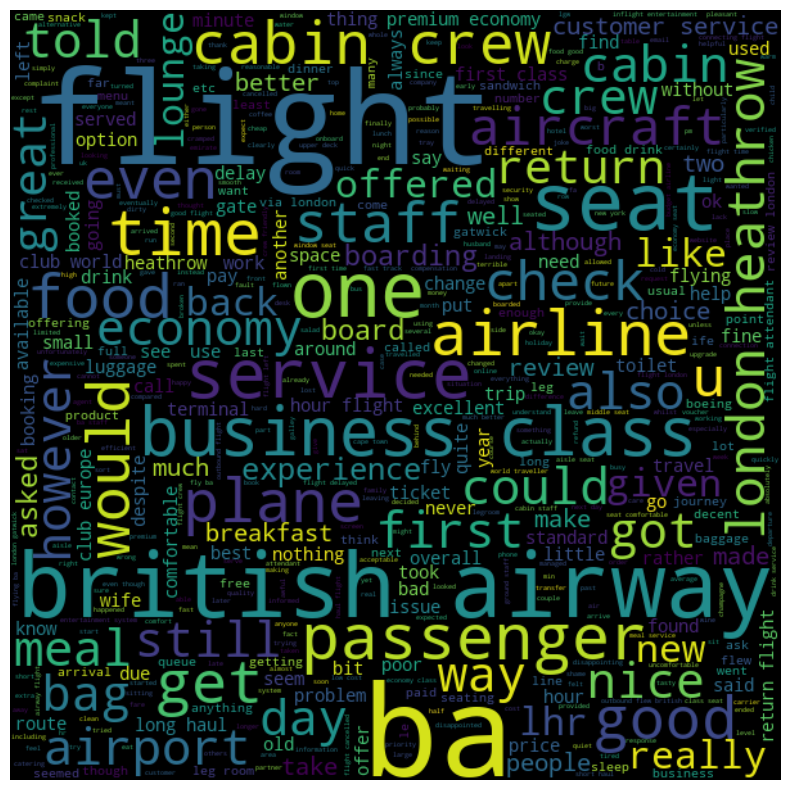

In [33]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

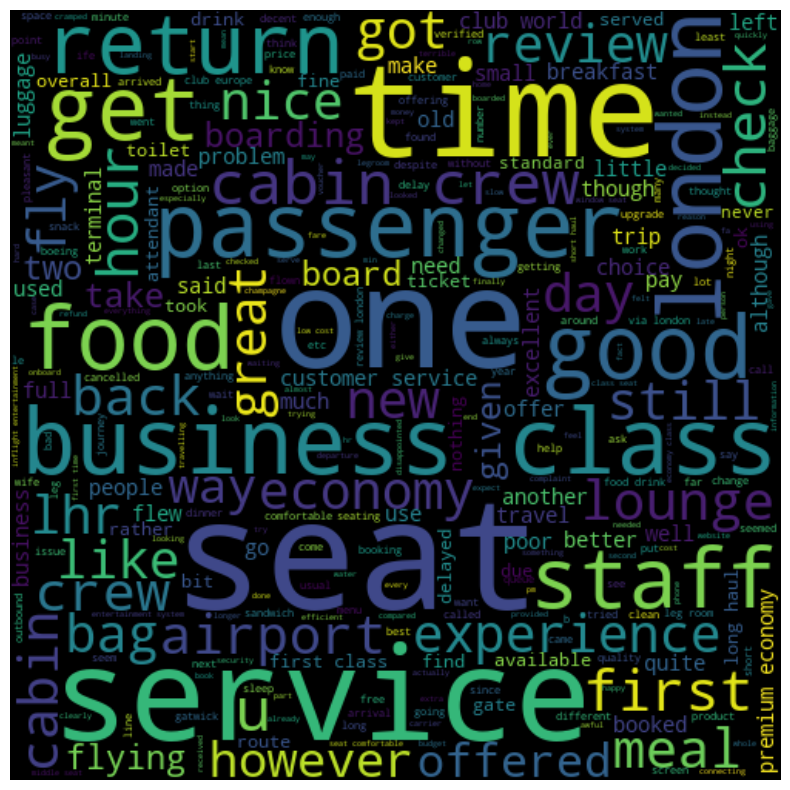

In [34]:
#removing words does not add conlcusive value with stopwords list
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba", "asked", "flight", "could", "british","airway", "airline","plane", "also","told","passenger" \
                 "london", "heathrow", "aircraft", "really","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', "plane", "passenger",'ba', "london","airway","british","airline",\
                                           "review","heathrow","lhr"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#new dataframe of the new words and frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'u'),
  Text(18, 0, 'club'),
  Text(19, 0, 'boarding')])

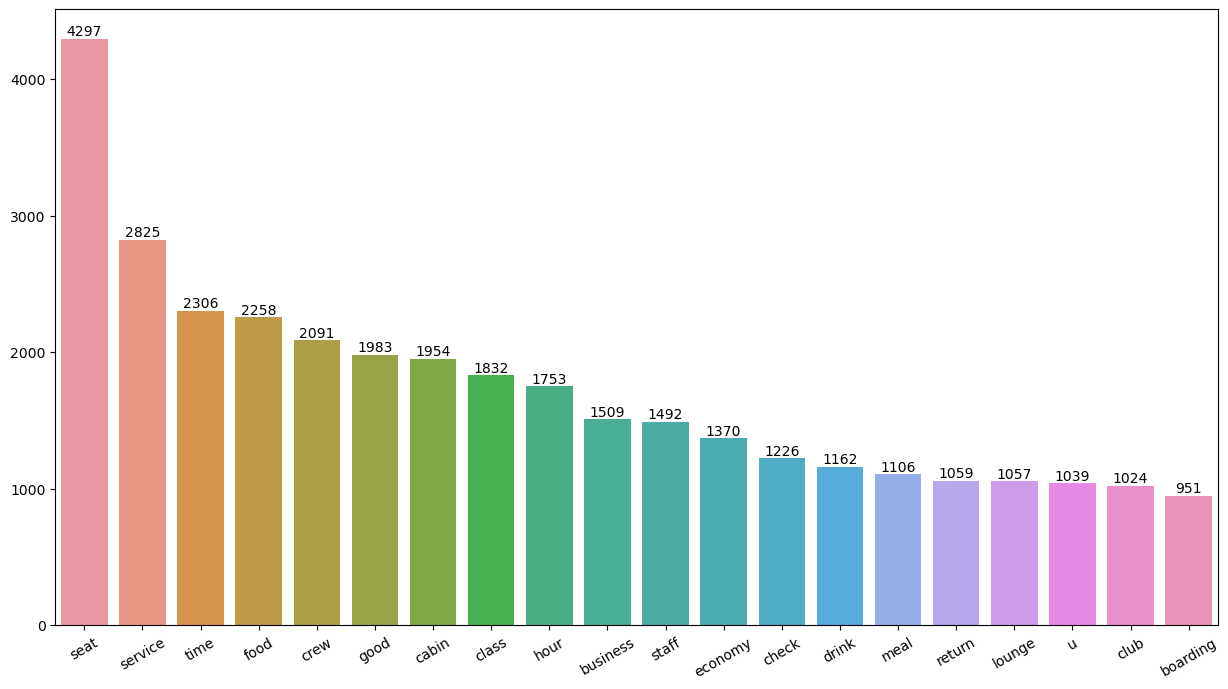

In [36]:
# Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

# Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<Axes: >

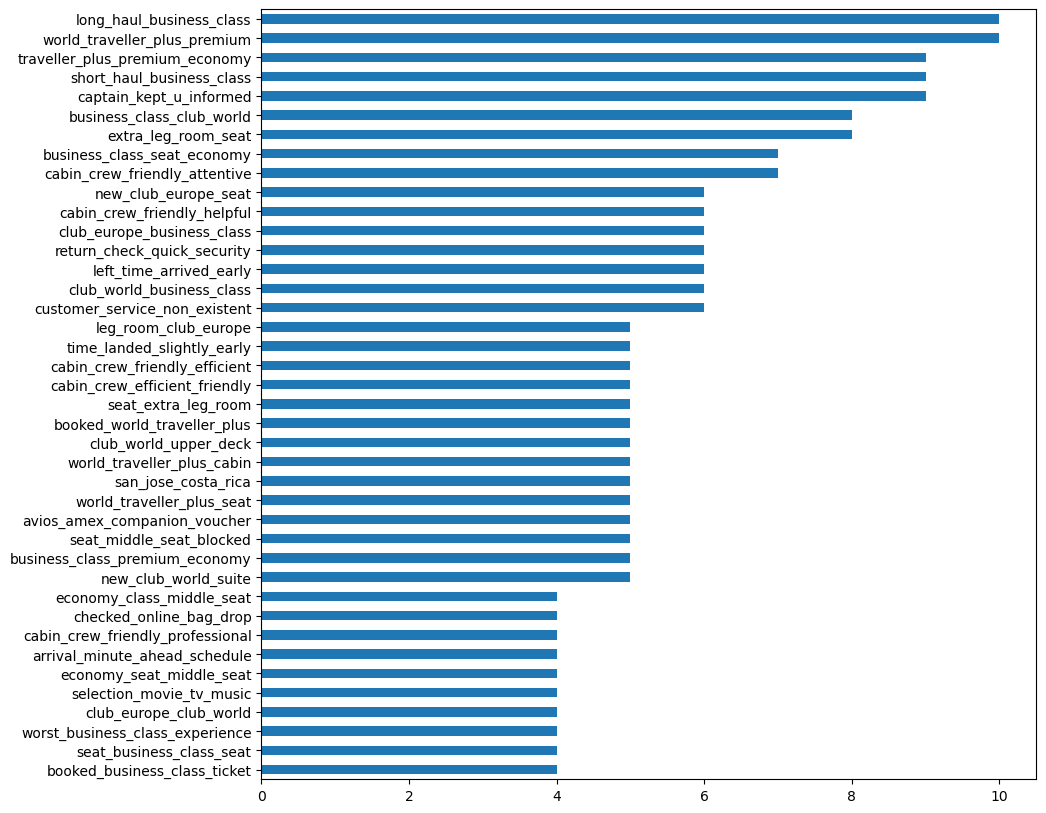

In [37]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

In [38]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

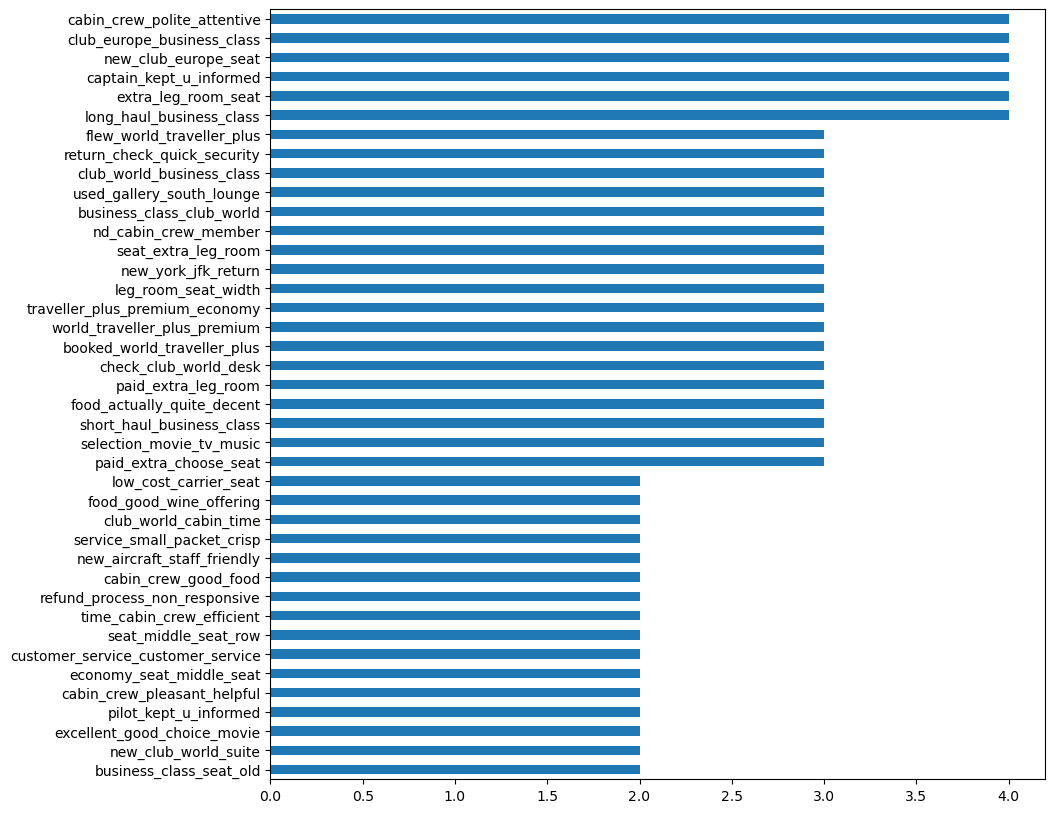

In [39]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

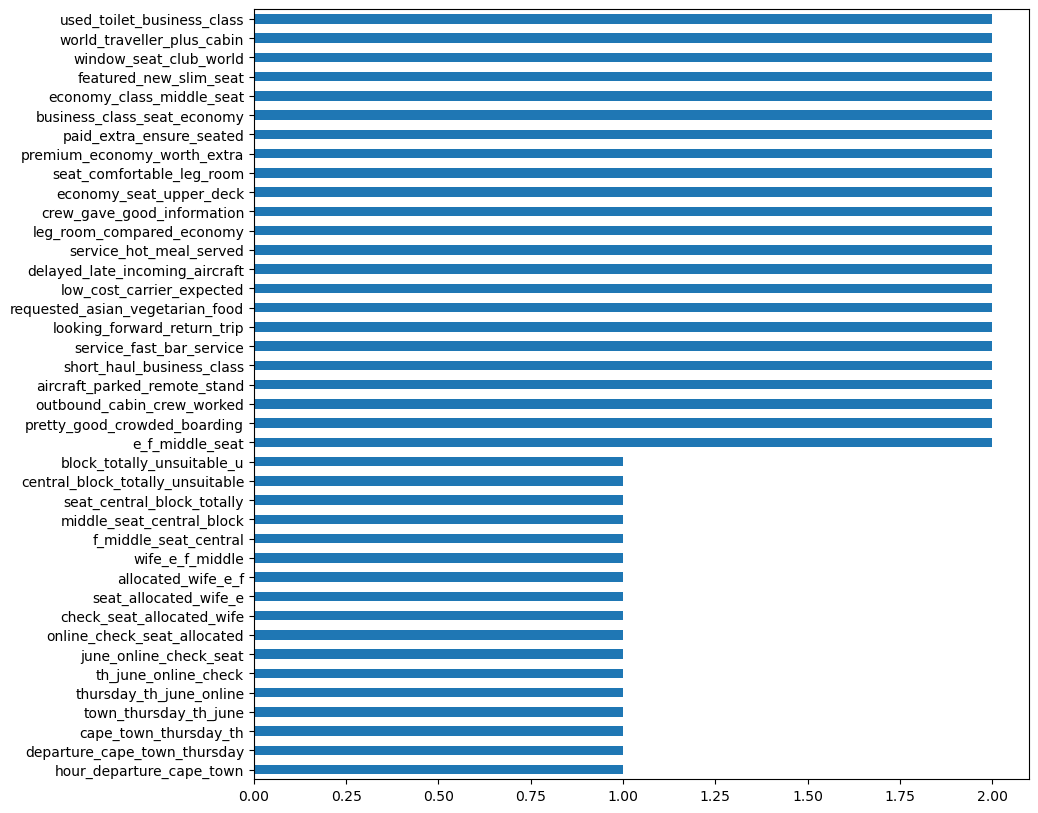

In [40]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

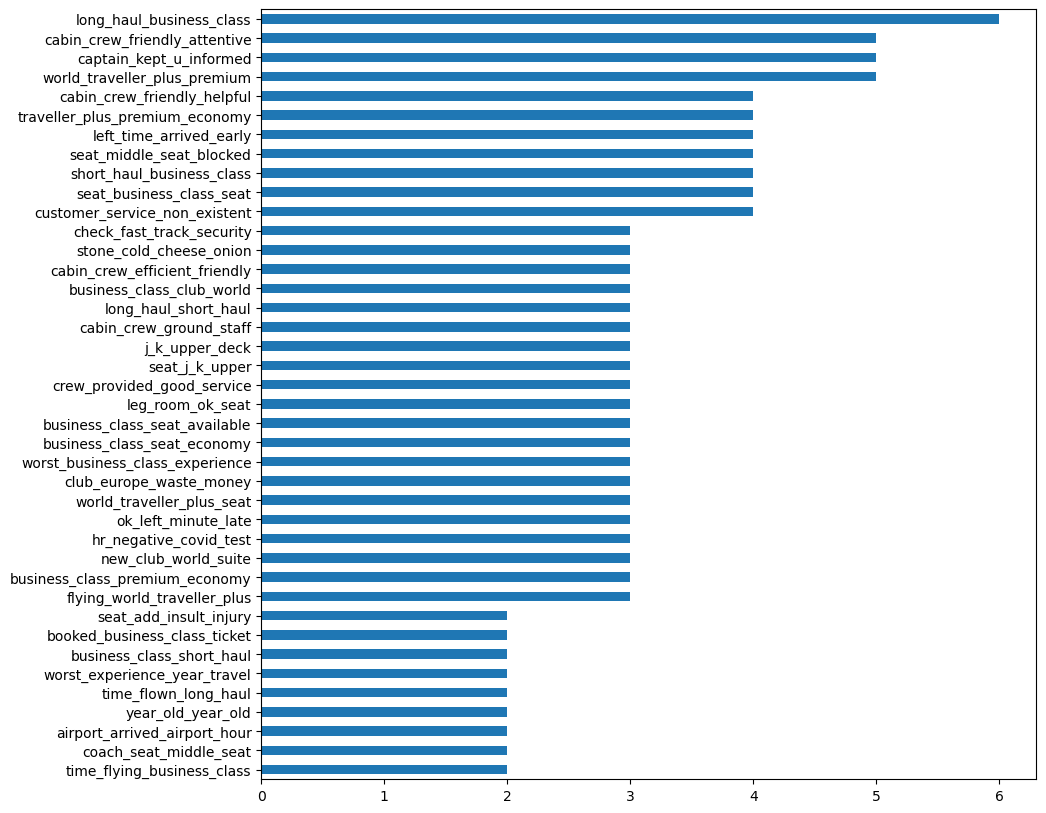

In [81]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [44]:
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 6.4 MB/s eta 0:00:00a 0:00:01


In [47]:
!pip3 install textblob

In [62]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [54]:
#set a column Polarity with all 0 values initially
df['polarity'] = 0

In [64]:
from textblob import TextBlob

for index, row in df.iterrows():
    if isinstance(row['corpus'], str):
        sent = TextBlob(row['corpus'])
        polarity = sent.sentiment.polarity
        subjectivity = sent.sentiment.subjectivity
        df.loc[index, 'polarity'] = polarity

In [65]:
print(df.columns.tolist())

['reviews', 'stars', 'date', 'country', 'verified', 'corpus', 'polarity']


In [67]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2361 number of reviews between -0.2 and 0.2 polarity score
1372 number of reviews between -0.1 and 0.1 polarity score


In [70]:
%%capture
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

In [71]:
#set a column Polarity with all 0 values initially
df['label'] = 0

In [74]:
for i in range(len(df.corpus)):
    try:
        score = vds.polarity_scores(df.corpus[i])['compound']
        # ...
    except KeyError:
        print(f"Error at index {i}: KeyError")

Error at index 2953: KeyError
Error at index 3054: KeyError
Error at index 3176: KeyError
Error at index 3196: KeyError
Error at index 3252: KeyError
Error at index 3439: KeyError
Error at index 3466: KeyError


In [77]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

vds = SentimentIntensityAnalyzer()

for index, row in df.iterrows():
    corpus_value = row['corpus']
    if isinstance(corpus_value, str):
        score = vds.polarity_scores(corpus_value)['compound']
        if score > 0.2:
            df.loc[index, 'label'] = 1
        elif score < 0:
            df.loc[index, 'label'] = -1
        else:
            df.loc[index, 'label'] = 0
    else:
        # Handle non-string values in the 'corpus' column
        df.loc[index, 'label'] = 0  # or any other appropriate value

In [78]:
label_value_counts = df['label'].value_counts()
print(label_value_counts)

 1    2249
-1    1125
 0     120
Name: label, dtype: int64


# Topic Modeling with LDA

In [91]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

In [92]:
#create an object of count vectorizer
vect = CountVectorizer()

In [94]:
df = df[df['corpus'].apply(lambda x: isinstance(x, str))]

# Create an object of the CountVectorizer
vect = CountVectorizer()

# Apply transformation
tf = vect.fit_transform(df.corpus).toarray()

# Get the feature names from the fitted vectorizer
tf_feature_names = vect.get_feature_names_out()

# Display the first few feature names from CountVectorizer
print("\nSample Feature Names from CountVectorizer:")
print(tf_feature_names[:10])


Sample Feature Names from CountVectorizer:
['aa' 'ab' 'aback' 'abandon' 'abandondoned' 'abandoned' 'abandoning'
 'abba' 'abbreviated' 'abd']


In [96]:
from sklearn.decomposition import LatentDirichletAllocation

In [97]:
#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic = pd.DataFrame(topic_dict)

In [98]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0        flight           147.5          seat           455.8          seat   
1          hour           122.2         class           297.7       economy   
2          meal           122.2      business           287.8          food   
3         asked           112.7          club           249.2       premium   
4     passenger            98.9            ba           186.5         cabin   
5         water            93.8        europe           158.6          crew   
6           one            80.8           get           142.8          meal   
7         plane            80.6        lounge           126.1           leg   
8          seat            78.8       economy           121.4          good   
9         staff            68.4     passenger           113.8         world   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0          1153.7        flight           844.3          main            18.5   
1           494.0      boarding           552.9         first            15.2   
2           272.0         check           546.2       chicken            14.5   
3           267.7            ba           545.7           abu            14.2   
4           266.9       service           430.9         dhabi            14.2   
5           251.6          time           408.3        cheese            11.8   
6           246.8        lounge           383.9         salad            11.2   
7           235.7          crew           357.2         prawn            11.1   
8           217.3           bag           341.4       starter            11.0   
9           209.0         drink           288.8        course             9.1   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0       british           802.6        flight          2470.6        flight   
1       airline           797.6            ba          1600.3            ba   
2        airway           794.3          seat          1430.1          hour   
3        flight           768.9          good          1307.3        london   
4       service           696.3          food          1051.1        airway   
5            ba           622.6          crew          1048.1       british   
6         class           601.4         cabin           937.2         would   
7          food           510.9          time           915.9          time   
8          seat           500.7       service           858.9      customer   
9        london           440.8           lhr           582.9       service   

  Topic 7 weights  
0          2916.2  
1          1640.5  
2           910.0  
3           760.9  
4           707.1  
5           706.4  
6           698.5  
7           643.5  
8           638.7  
9           628.4

# Topic modeling with NMF

In [99]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.00523018, 0.04435056],
       [0.02904249, 0.25604561],
       [0.08784021, 0.00391644],
       ...,
       [0.05449503, 0.0302591 ],
       [0.04586198, 0.07321782],
       [0.07649895, 0.0372881 ]])

In [100]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

In [101]:
df_topic =pd.DataFrame(topic_dict)

In [102]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights
0        flight            34.7          seat            17.0
1            ba            11.9            ba             8.9
2          hour             7.7         class             7.3
3          time             6.7          food             5.9
4        london             6.0      business             5.7
5       service             5.7       service             5.6
6        airway             5.6         cabin             5.5
7       british             5.5          good             5.0
8         would             5.0          crew             5.0
9       airline             4.4       economy             4.6